__1. Tokenización y frecuencia de palabras__

* NLTK

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

# ATENCIÓN!!!
# ===========
# la siguiente línea sólo es necesaria la primera vez y de la pantalla que sale
# hay que instalar la opción "popular" para que las siguientes celdas funcionen
#
# nltk.download()

In [2]:
#1. Vamos a hacer la tokenización
from nltk.tokenize import word_tokenize

# Oración de ejemplo
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America"

# Tokenizacion
token_list = word_tokenize(text)
print(f"La oración tiene {len(token_list)} tokens, y se desglosa así:\n{token_list}")

La oración tiene 24 tokens, y se desglosa así:
['In', 'Brazil', 'they', 'drive', 'on', 'the', 'right-hand', 'side', 'of', 'the', 'road', '.', 'Brazil', 'has', 'a', 'large', 'coastline', 'on', 'the', 'eastern', 'side', 'of', 'South', 'America']


In [3]:
#2. Contamos el número de ocurrencias de cada palabra
from nltk.probability import FreqDist
fdist = FreqDist(token_list)
print(f"La oración tiene {len(fdist)} tokens únicos y su diccionario de ocurrencias es:\n{dict(fdist)}")

La oración tiene 18 tokens únicos y su diccionario de ocurrencias es:
{'In': 1, 'Brazil': 2, 'they': 1, 'drive': 1, 'on': 2, 'the': 3, 'right-hand': 1, 'side': 2, 'of': 2, 'road': 1, '.': 1, 'has': 1, 'a': 1, 'large': 1, 'coastline': 1, 'eastern': 1, 'South': 1, 'America': 1}


Top 10 tokens más comunes: [('the', 3), ('Brazil', 2), ('on', 2), ('side', 2), ('of', 2), ('In', 1), ('they', 1), ('drive', 1), ('right-hand', 1), ('road', 1)]


<BarContainer object of 10 artists>

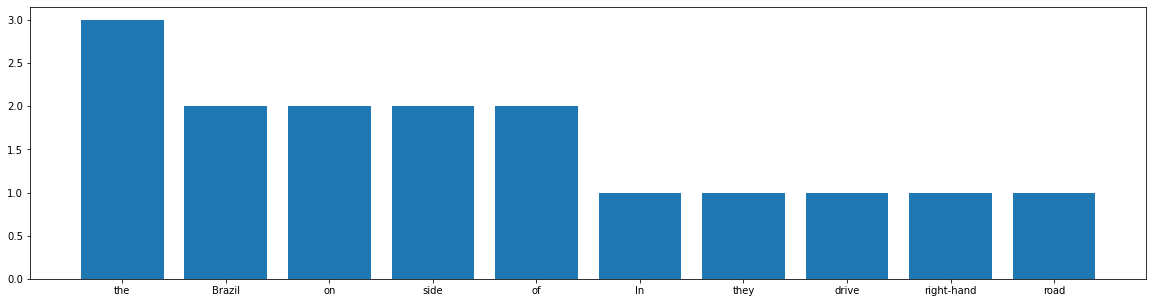

In [4]:
#3. Visualizamos el top 10 de tokens más comunes
common_words = fdist.most_common(10)
print(f"Top 10 tokens más comunes: {common_words}")

plt.figure(figsize=(20,5))
plt.bar(dict(common_words).keys(),dict(common_words).values())

* SpaCy

In [5]:
# ATENCIÓN
# ========
# la primera vez que lo ejecutemos tendremos que descomentar lo siguiente

#!pip install -U pip setuptools wheel
#!pip install -U spacy
# !python -m spacy download en_core_web_sm
# !python -m spacy download es_core_news_sm

In [6]:
#Importamos la librería y cargamos el idioma de trabajo
import spacy
nlp = spacy.load("en_core_web_sm")

In [7]:
#Elegimos una oración de ejemplo
sentence = "'Next week, we're coming from U.S. and we're excited!'"

print(f"¿Qué valor corresponde a la posición 2?:\n{sentence[2]}")

¿Qué valor corresponde a la posición 2?:
e


In [8]:
#1. Tokenizamos con Spacy
doc = nlp(sentence)
print(f"La oración tokenizada es:\n{doc}")

La oración tokenizada es:
'Next week, we're coming from U.S. and we're excited!'


In [9]:
print(f"¿Qué valor corresponde a la posición 2?:\n{doc[2]}")

¿Qué valor corresponde a la posición 2?:
week


In [10]:
#2. Contamos ocurrencias
from collections import Counter

words = []
for token in doc:
    words.append(token.text)

word_freq = Counter(words)
print(f"La oración tiene {len(word_freq)} tokens únicos y su diccionario de ocurrencias es:\n{word_freq}")

La oración tiene 12 tokens únicos y su diccionario de ocurrencias es:
Counter({"'": 2, 'we': 2, "'re": 2, 'Next': 1, 'week': 1, ',': 1, 'coming': 1, 'from': 1, 'U.S.': 1, 'and': 1, 'excited': 1, '!': 1})


Top 5 tokens más comunes: [("'", 2), ('we', 2), ("'re", 2), ('Next', 1), ('week', 1)]


<BarContainer object of 5 artists>

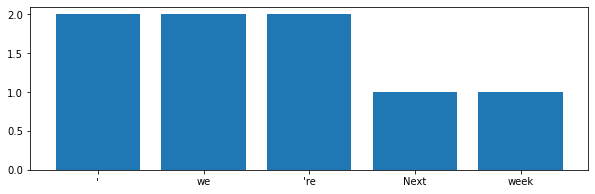

In [11]:
#3. Visualizamos el top 5 de palabras
common_words = word_freq.most_common(5)

print(f"Top 5 tokens más comunes: {common_words}")

plt.figure(figsize=(10,3))
plt.bar(dict(common_words).keys(),dict(common_words).values())

__2. Stemming__

* Sólo NLTK

In [12]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

po_stemmer = PorterStemmer()
sn_stemmer = SnowballStemmer(language='spanish')
la_stemmer = LancasterStemmer()

tokens = ['computar', 'computación', 'computados', 'comparación']

for token in tokens:
    print(f"{token} --> [{po_stemmer.stem(token)}, {sn_stemmer.stem(token)}, {la_stemmer.stem(token)}]")

computar --> [computar, comput, comput]
computación --> [computación, comput, computación]
computados --> [computado, comput, computado]
comparación --> [comparación, compar, comparación]


__3. Lematización__

* NLTK (hay que bajarse wordnet y el paquete omw)

In [13]:
#Descargamos los paquetes
nltk.download('wordnet')
nltk.download('omw-1.4')

#Generamos la oración
text = """While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """

[nltk_data] Downloading package wordnet to /home/yuki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/yuki/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
#Importamos el lematizador
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenizamos
doc = word_tokenize(text)

#Lematizamos las palabras
for token in doc:
    print(f"Palabra: {token} - Lema: {lemmatizer.lemmatize(token)}")

Palabra: While - Lema: While
Palabra: Samsung - Lema: Samsung
Palabra: has - Lema: ha
Palabra: expanded - Lema: expanded
Palabra: overseas - Lema: overseas
Palabra: , - Lema: ,
Palabra: South - Lema: South
Palabra: Korea - Lema: Korea
Palabra: is - Lema: is
Palabra: still - Lema: still
Palabra: host - Lema: host
Palabra: to - Lema: to
Palabra: most - Lema: most
Palabra: of - Lema: of
Palabra: its - Lema: it
Palabra: factories - Lema: factory
Palabra: and - Lema: and
Palabra: research - Lema: research
Palabra: engineers - Lema: engineer
Palabra: . - Lema: .


* SpaCy

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc:
    print(f"Palabra: {token} - Lema: {token.lemma_}")

Palabra: While - Lema: while
Palabra: Samsung - Lema: Samsung
Palabra: has - Lema: have
Palabra: expanded - Lema: expand
Palabra: overseas - Lema: overseas
Palabra: , - Lema: ,
Palabra: South - Lema: South
Palabra: Korea - Lema: Korea
Palabra: is - Lema: be
Palabra: still - Lema: still
Palabra: host - Lema: host
Palabra: to - Lema: to
Palabra: most - Lema: most
Palabra: of - Lema: of
Palabra: its - Lema: its
Palabra: factories - Lema: factory
Palabra: and - Lema: and
Palabra: research - Lema: research
Palabra: engineers - Lema: engineer
Palabra: . - Lema: .


In [16]:
#Probamos ahora en español
nlp = spacy.load('es_core_news_sm')
text = "Si no fui a los países asiáticos el año pasado, como China, tampoco iré este año."
doc = nlp(text)
for token in doc:
    print(f"Palabra: {token} - Lema: {token.lemma_}")

Palabra: Si - Lema: si
Palabra: no - Lema: no
Palabra: fui - Lema: ir
Palabra: a - Lema: a
Palabra: los - Lema: el
Palabra: países - Lema: país
Palabra: asiáticos - Lema: asiático
Palabra: el - Lema: el
Palabra: año - Lema: año
Palabra: pasado - Lema: pasado
Palabra: , - Lema: ,
Palabra: como - Lema: como
Palabra: China - Lema: China
Palabra: , - Lema: ,
Palabra: tampoco - Lema: tampoco
Palabra: iré - Lema: ir
Palabra: este - Lema: este
Palabra: año - Lema: año
Palabra: . - Lema: .


__3. Análisis Morfológico (Part-of-speech)__ --> Directamente con el tokenizado

* NLTK (hay que descargar paquete)

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yuki/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
text = "I am dancing."

#Tokenizado
tex = word_tokenize(text)

#Análisis Morfológico
for token in tex:
    print(nltk.pos_tag([token]))

[('I', 'PRP')]
[('am', 'VBP')]
[('dancing', 'VBG')]
[('.', '.')]


* SpaCy

In [19]:
text = "Vamos a ganar el Mundial de fútbol de 2022."
doc = nlp(text)
for token in doc:
    print(f"Palbra: {token} - Tipo Morfológico: {token.pos_}")

Palbra: Vamos - Tipo Morfológico: AUX
Palbra: a - Tipo Morfológico: ADP
Palbra: ganar - Tipo Morfológico: VERB
Palbra: el - Tipo Morfológico: DET
Palbra: Mundial - Tipo Morfológico: PROPN
Palbra: de - Tipo Morfológico: ADP
Palbra: fútbol - Tipo Morfológico: NOUN
Palbra: de - Tipo Morfológico: ADP
Palbra: 2022 - Tipo Morfológico: NOUN
Palbra: . - Tipo Morfológico: PUNCT


__5. Otras visualizaciones con SpaCy__

* Análisis sintáctico de oraciones

In [20]:
from spacy import displacy

#Visualizamos el análisis morfológico en profundidad
text = "Vamos a ganar el Mundial de fútbol de 2022."
nlp = spacy.load('es_core_news_sm')
doc = nlp(text)
displacy.render(doc, style="dep", options = { "distance": 100})

* Reconocimiento de entidades

In [21]:
text = "When Sebastian Thrun started working on self-driving cars at Tesla in 2007, few people outside of the company took him seriously."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent")

* Nube de palabras

Empezamos cargando la librería wordcloud

!pip install wordcloud

Cargamos las liberias de Python y los datos de una base de datos de películas en Pandas

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk

movies = pd.read_csv('./Data/tmdb_5000_movies.csv')

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Revisamos dónde está la información textual

In [23]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Tokenizamos la columna de descripción 'tagline'

In [24]:
#Generamos una columna en pandas que no tenga NaN (dropna), y tokenizada
words=movies["tagline"].dropna().apply(nltk.word_tokenize)
words.head()

0                  [Enter, the, World, of, Pandora, .]
1    [At, the, end, of, the, world, ,, the, adventu...
2                          [A, Plan, No, One, Escapes]
3                                  [The, Legend, Ends]
4     [Lost, in, our, world, ,, found, in, another, .]
Name: tagline, dtype: object

Hacemos una unica lista con todas las palabras

In [25]:
list_words = words.sum()

print(list_words[:20])

['Enter', 'the', 'World', 'of', 'Pandora', '.', 'At', 'the', 'end', 'of', 'the', 'world', ',', 'the', 'adventure', 'begins', '.', 'A', 'Plan', 'No']


Eliminamos las palabras más comunes que no aportan significado

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...','...',' ','','name','id','the',"'s", 'a', '\'re',"'nt")

clean_words = []
for word in list_words:
    if word.lower() not in stop_words:
        clean_words.append(word.lower())


print(clean_words[:20])

['enter', 'world', 'pandora', 'end', 'world', 'adventure', 'begins', 'plan', 'one', 'escapes', 'legend', 'ends', 'lost', 'world', 'found', 'another', 'battle', 'within', "'re", 'taking']


Generamos la nube de palabras

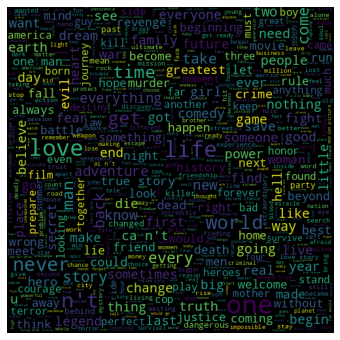

In [27]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=1000, stopwords=stop_words, max_font_size= 40,width=500,height=500)
wc.generate(" ".join(clean_words))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Top 5 tokens más comunes: [('love', 212), ('life', 187), ('never', 166), ('story', 152), ('world', 139), ('man', 137)]


<BarContainer object of 6 artists>

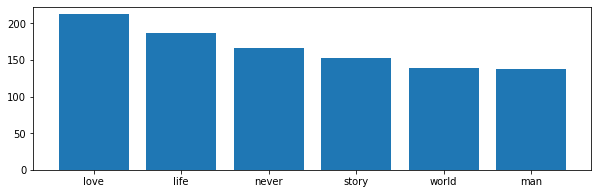

In [28]:
#Miramos frecuencia de palabras
word_freq = Counter(clean_words)
common_words = word_freq.most_common(10)[4:]

print(f"Top 5 tokens más comunes: {common_words}")

plt.figure(figsize=(10,3))
plt.bar(dict(common_words).keys(),dict(common_words).values())